In [ ]:
from google.colab import files
import pandas as pd
import io

In [ ]:
#uploaded = files.upload()
#df = pd.read_csv('tamil_test1.csv')
df= pd.read_csv('eng-tam_3_train.csv')
df.head(3)

df = df[['text','category']]

In [ ]:
df.head(10)

,text,category
0,@Kadhayalla Nijam thaa gay Punda Apo ne confi...,Homophobic
1,love you too Nanba,Non-anti-LGBT+ content
2,Semma super 👍👍👍👍,Non-anti-LGBT+ content
3,Ava ka elom kadavuluka,Non-anti-LGBT+ content
4,Bro gay persons kalyanam panninaa kozhanda pet...,Non-anti-LGBT+ content
5,Vera leval romba super,Non-anti-LGBT+ content
6,Simple! Ungaluku pudikkalana kandukkaadheenga!,Non-anti-LGBT+ content
7,Prakash Durairaj.. naan saabam vidran. Unaku ...,Non-anti-LGBT+ content
8,nalla cinematic typela peasringa,Non-anti-LGBT+ content
9,@George Shankar amanga enakku yarum gaynu sol...,Non-anti-LGBT+ content


In [ ]:
sentiment_label = df.category.factorize()

In [ ]:
sentiment_label


(array([0, 1, 1, ..., 1, 1, 1]),
 Index(['Homophobic', 'Non-anti-LGBT+ content', 'Transphobic'], dtype='object'))

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
mytext = df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(mytext)

In [ ]:
mytext

array(['@Kadhayalla Nijam\xa0 thaa gay Punda Apo ne confirm gay tha',
       'love you  too Nanba', 'Semma super 👍👍👍👍', ...,
       'Frnds neenga antha yedathula a irrunthaalum amaithiyaa dha irrupeenga........ Yeanaa antha yedathula yaaru irrunthaalum asinga paduvomnu bayam.....',
       'Looking pretty 🤩',
       'Apadi kai vekkumbothu kevalama yevono thittita ena panrathu'],
      dtype=object)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(mytext)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)


In [ ]:
encoded_docs

[[478, 479, 321, 35, 106, 204, 39, 3706, 35, 42],
 [11, 21, 345, 71],
 [50, 3, 3707],
 [322, 237, 3708, 3709],
 [1, 35, 1535, 238, 3710, 3711, 1195, 3712, 3713, 740, 323, 49, 834, 1536],
 [8, 239, 22, 3],
 [741, 93, 3714, 2128],
 [1196,
  1197,
  124,
  2129,
  3715,
  131,
  3716,
  398,
  582,
  742,
  1198,
  399,
  14,
  2130,
  139,
  324,
  158,
  158,
  158,
  199,
  1199,
  400],
 [10, 3717, 3718, 3719],
 [2131,
  2132,
  3720,
  191,
  205,
  2133,
  1200,
  306,
  220,
  3721,
  27,
  3722,
  36,
  2134,
  1201,
  191,
  2135,
  3723,
  28,
  111,
  2134,
  87,
  15,
  3724,
  650,
  31,
  111,
  364,
  2136,
  3725,
  3726,
  325,
  2137,
  226,
  3727],
 [2138, 29, 30, 2139, 68, 3728],
 [442, 2140, 835, 2141],
 [41, 27, 2142, 43, 997, 240],
 [365, 583, 836],
 [88, 159, 31, 3729, 1537, 3730, 837, 1202, 838],
 [2143,
  2143,
  516,
  16,
  56,
  3731,
  56,
  743,
  3732,
  2144,
  2145,
  517,
  998,
  3733,
  3734,
  16,
  3735,
  3736,
  107,
  307,
  3737],
 [651, 2146, 1

In [ ]:
padded_sequence

array([[   0,    0,    0, ..., 3706,   35,   42],
       [   0,    0,    0, ...,   21,  345,   71],
       [   0,    0,    0, ...,   50,    3, 3707],
       ...,
       [   0,    0,    0, ..., 3705,  401, 1131],
       [   0,    0,    0, ...,  878, 1854, 1620],
       [   0,    0,    0, ...,  230,   70,  305]], dtype=int32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [ ]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           429824    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 5)                 255       
                                                                 
Total params: 446,679
Trainable params: 446,679
Non-trainable params: 0
__________________________________________________

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


In [ ]:
# Input for variable-length sequences of integers
inputs = tensorflow.keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = tensorflow.keras.layers.Embedding(vocab_size, 128)(inputs)
# Add 2 bidirectional LSTMs
x = tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(64, return_sequences=True))(x)
x = tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(64))(x)
# Add a classifier
outputs = tensorflow.keras.layers.Dense(5, activation="sigmoid")(x)
model = tensorflow.keras.Model(inputs, outputs)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 
#model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         1719296   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 1,917,573
Trainable params: 1,917,573
Non-train

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],epochs=5,batch_size=128,validation_split=0.2)


Epoch 1/5
25/25 [==============================] - 17s 297ms/step - loss: 0.6964 - accuracy: 0.8569 - val_loss: 0.4136 - val_accuracy: 0.8939
Epoch 2/5
25/25 [==============================] - 6s 229ms/step - loss: 0.4153 - accuracy: 0.8896 - val_loss: 0.4025 - val_accuracy: 0.8939
Epoch 3/5
25/25 [==============================] - 6s 237ms/step - loss: 0.3948 - accuracy: 0.8896 - val_loss: 0.3850 - val_accuracy: 0.8939
Epoch 4/5
25/25 [==============================] - 6s 229ms/step - loss: 0.3188 - accuracy: 0.9058 - val_loss: 0.3707 - val_accuracy: 0.8913
Epoch 5/5
25/25 [==============================] - 6s 230ms/step - loss: 0.2088 - accuracy: 0.9449 - val_loss: 0.4094 - val_accuracy: 0.8732


In [ ]:
from google.colab import files
import pandas as pd
import io

In [ ]:
#uploaded = files.upload()
#df = pd.read_csv('tamil_test1.csv')
df= pd.read_csv('Tamil-English-test-without-labels.csv')


In [ ]:
df.head(3)

,text,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Ivlo therinjum kadaisi la saga manushana dead ...,NaN,NaN,NaN
1,Neenga gay va,NaN,NaN,NaN
2,3.42 sec ultimate,NaN,NaN,NaN


In [ ]:
df = df[['text']]
df.head(10)

,text
0,Ivlo therinjum kadaisi la saga manushana dead ...
1,Neenga gay va
2,3.42 sec ultimate
3,Bro endha oru nega soluga bro
4,Super Anda akkavukku enathu anbarntha vaalthuk...
5,I want permanent lifepartner
6,Yogesh Waran Hey nee 9 taane
7,Kolai Seibavan Kooda avanukku oru niyayam vait...
8,I love you akka
9,Ala vachitiyae nanba


In [ ]:
import numpy as np
tweet = df.text.values

In [ ]:
tweet

array(['Ivlo therinjum kadaisi la saga manushana dead body koodayum animals \nkoodayum compare panniteenga! \n Arumai ji!',
       'Neenga gay va', '3.42 sec ultimate ', ...,
       'rompa azhagana devathai mathiri irukinga neenga.',
       'Ore aalu avan ellaathaium ethirkiraan, paravaa illai,\nSerupu.. Otha sex na enanu therichikitu pesuda badu',
       'Mein ha beach la idhunga thola thangave mudiyala... respect ha kuduikka \nkudathu..ithungala pavame pakka koodadhu'],
      dtype=object)

In [ ]:
i=0
for test_word in tweet:
  seq = tokenizer.texts_to_sequences([test_word])
  padded = pad_sequences(seq,maxlen=200)
  pred = model.predict(padded)
  labels = ['Homophobic', 'Non-anti-LGBT+ content', 'Transphobic'] 
  #print(pred)
  #print(np.argmax(pred))
  print(labels[np.argmax(pred)-1])
  print (i)
  i=i+1

Homophobic
0
Homophobic
1
Homophobic
2
Homophobic
3
Homophobic
4
Homophobic
5
Transphobic
6
Homophobic
7
Homophobic
8
Homophobic
9
Homophobic
10
Homophobic
11
Homophobic
12
Transphobic
13
Homophobic
14
Homophobic
15
Homophobic
16
Homophobic
17
Homophobic
18
Homophobic
19
Transphobic
20
Homophobic
21
Homophobic
22
Homophobic
23
Homophobic
24
Transphobic
25
Homophobic
26
Homophobic
27
Homophobic
28
Homophobic
29
Homophobic
30
Homophobic
31
Homophobic
32
Homophobic
33
Transphobic
34
Homophobic
35
Homophobic
36
Homophobic
37
Homophobic
38
Homophobic
39
Transphobic
40
Homophobic
41
Homophobic
42
Transphobic
43
Homophobic
44
Homophobic
45
Homophobic
46
Homophobic
47
Homophobic
48
Transphobic
49
Homophobic
50
Homophobic
51
Homophobic
52
Homophobic
53
Homophobic
54
Transphobic
55
Homophobic
56
Homophobic
57
Homophobic
58
Homophobic
59
Homophobic
60
Homophobic
61
Transphobic
62
Homophobic
63
Homophobic
64
Homophobic
65
Homophobic
66
Homophobic
67
Homophobic
68
Homophobic
69
Homophobic
70
Homoph

In [ ]:
tweet = df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence1 = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
y_pred = model.predict(padded_sequence, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)


61/61 [==============================] - 4s 65ms/step


In [ ]:
print(classification_report(sentiment_label[0], y_pred_bool))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       311
           1       0.97      0.98      0.97      3438
           2       0.00      0.00      0.00       112

    accuracy                           0.94      3861
   macro avg       0.55      0.61      0.58      3861
weighted avg       0.92      0.94      0.93      3861



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


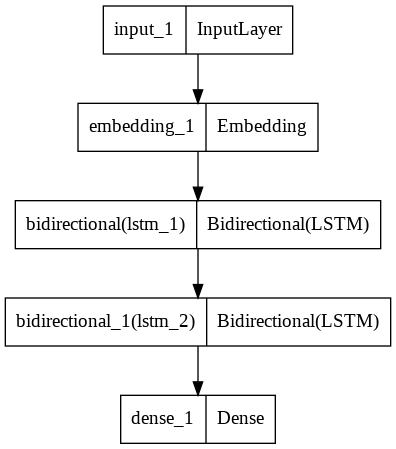

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],epochs=5,batch_size=128,validation_split=0.2)

tokenizer.word_index.get("Trailer", "word not in the vocabulary")

tokenizer.num_words

tokenizer.oov_token


Epoch 1/5
25/25 [==============================] - 6s 229ms/step - loss: 0.1482 - accuracy: 0.9553 - val_loss: 0.4847 - val_accuracy: 0.8913
Epoch 2/5
25/25 [==============================] - 6s 229ms/step - loss: 0.0997 - accuracy: 0.9666 - val_loss: 0.5119 - val_accuracy: 0.8603
Epoch 3/5
25/25 [==============================] - 6s 229ms/step - loss: 0.0824 - accuracy: 0.9728 - val_loss: 0.5822 - val_accuracy: 0.8732
Epoch 4/5
25/25 [==============================] - 6s 227ms/step - loss: 0.0688 - accuracy: 0.9764 - val_loss: 0.6750 - val_accuracy: 0.8266
Epoch 5/5
25/25 [==============================] - 6s 229ms/step - loss: 0.0612 - accuracy: 0.9806 - val_loss: 0.6301 - val_accuracy: 0.8680


In [ ]:
test_word ="enna padam mass"
tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw,maxlen=200)
tw

prediction = int(model.predict(tw).round().item())
sentiment_label[1][prediction]

ValueError: ignored